<a href="https://colab.research.google.com/github/omartarek198/chess-computer-vision-/blob/main/CHESS_COMPUTER_VISION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12123, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 12123 (delta 41), reused 57 (delta 27), pack-reused 12047
Receiving objects: 100% (12123/12123), 12.56 MiB | 29.31 MiB/s, done.
Resolving deltas: 100% (8334/8334), done.
/content/yolov5
     |████████████████████████████████| 1.6 MB 9.6 MB/s 
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="") #left blank for security
project = rf.workspace("hobby-e2jf4").project("chess-cv")
dataset = project.version(9).download("yolov5")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to CHESS-CV-9 in yolov5pytorch:: 100%|██████████| 74/74 [00:00<00:00, 1938.70it/s]


In [7]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/CHESS-CV-9/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-73-g91a81d4 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015

In [8]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/CHESS-CV-9/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-73-g91a81d4 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
image 1/3 /content/yolov5/CHESS-CV-9/test/images/20_jpg.rf.5a75b47374ba5c33323499982a7b81f2.jpg: 416x416 3 BlackKings, 9 BlackPawns, 3 BlackQueens, 2 WhiteKings, 16 WhitePawns, 8.3ms
image 2/3 /content/yolov5/CHESS-CV-9/test/images/21_jpg.rf.42d59dfe3720ff2d6919f824549e746e.jpg: 416x416 3 BlackKings, 12 BlackPawns, 2 BlackQueens, 2 WhiteKing

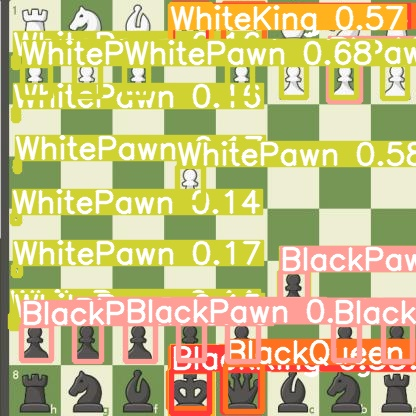

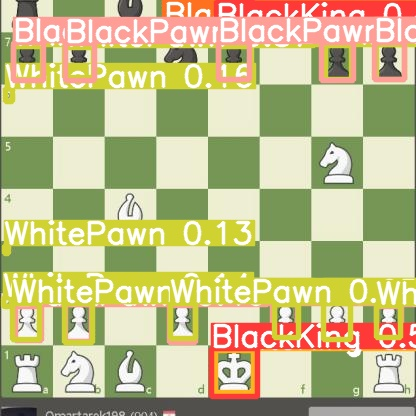

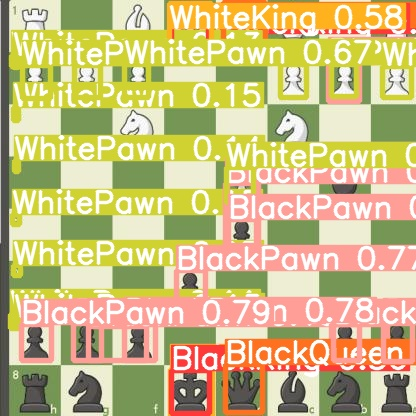

In [9]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')